In [1]:
from datetime import timedelta
import cv2
import torch
import numpy as np
import os
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from finalModel import FinalModel2
%load_ext autoreload
%autoreload 2

In [3]:
# то есть, если видео длительностью 30 секунд, сохраняется 10 кадров в секунду = всего сохраняется 300 кадров
SAVING_FRAMES_PER_SECOND = 30

In [4]:
def format_timedelta(td):
    """Служебная функция для классного форматирования объектов timedelta (например, 00:00:20.05)
    исключая микросекунды и сохраняя миллисекунды"""
    result = str(td)
    try:
        result, ms = result.split(".")
    except ValueError:
        return result + ".00".replace(":", "-")
    ms = int(ms)
    ms = round(ms / 1e4)
    return f"{result}.{ms:02}".replace(":", "-")


def get_saving_frames_durations(cap, saving_fps):
    """Функция, которая возвращает список длительностей, в которые следует сохранять кадры."""
    s = []
    # получаем продолжительность клипа, разделив количество кадров на количество кадров в секунду
    clip_duration = cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS)
    # используйте np.arange () для выполнения шагов с плавающей запятой
    for i in np.arange(0, clip_duration, 1 / saving_fps):
        s.append(i)
    return s

In [5]:
def main(video_file):
    filename, _ = os.path.splitext(video_file)
    filename += "-opencv"
    # создаем папку по названию видео файла
    if not os.path.isdir(filename):
        os.mkdir(filename)
    # читать видео файл    
    cap = cv2.VideoCapture(video_file)
    # получить FPS видео
    fps = cap.get(cv2.CAP_PROP_FPS)
    # если SAVING_FRAMES_PER_SECOND выше видео FPS, то установите его на FPS (как максимум)
    saving_frames_per_second = min(fps, SAVING_FRAMES_PER_SECOND)
    # получить список длительностей для сохранения
    saving_frames_durations = get_saving_frames_durations(cap, saving_frames_per_second)
    # запускаем цикл
    count = 0
    while True:
        is_read, frame = cap.read()
        if not is_read:
            # выйти из цикла, если нет фреймов для чтения
            break
        # получаем продолжительность, разделив количество кадров на FPS
        frame_duration = count / fps
        try:
            # получить самую раннюю продолжительность для сохранения
            closest_duration = saving_frames_durations[0]
        except IndexError:
            # список пуст, все кадры длительности сохранены
            break
        if frame_duration >= closest_duration:
            # если ближайшая длительность меньше или равна длительности кадра,
            # затем сохраняем фрейм
            frame_duration_formatted = format_timedelta(timedelta(seconds=frame_duration))
            cv2.imwrite(os.path.join(filename, f"frame{frame_duration_formatted}.jpg"), frame) 
            # удалить точку продолжительности из списка, так как эта точка длительности уже сохранена
            try:
                saving_frames_durations.pop(0)
            except IndexError:
                pass
        # увеличить количество кадров
        count += 1

In [41]:
# main("film.mp4")
# main("film2.mp4")
# main("film3.mp4")
# main("film4.mp4")
# main("film5.mp4")
# main("film6.mp4")
# main("film7.mp4")

In [6]:
final_model = FinalModel2()

In [7]:
?cv2.VideoWriter

In [8]:
def test_model(folder, img_name, model):
    img = cv2.imread(os.path.join(folder, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     print(img.shape)
#     img_mask = get_img_mask(img_name)
#     print(type(img))
    with torch.no_grad():
        res = model(torch.from_numpy(img).short().permute((2, 0, 1))).numpy()
    fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(15, 15))
    q = np.zeros(img.shape)
#     for i in range(len(q)):
#         for j in range(len(q[0])):
#             if res[i, j]:
#                 q[i, j] = img[i, j]
# #                 q[i, j, 1] = img[i, j, 1]
# #                 q[i, j, 2] = img[i, j, 2]
# #                 print(q[i, j])
    q[res.astype(bool)] = img[res.astype(bool)]
    print(q.shape)
    axs[0].imshow(res)
    axs[1].imshow(img)
    axs[2].imshow(q.astype(int))
    plt.show()

In [9]:
def run_model(folder, img_name, model):
    img = cv2.imread(os.path.join(folder, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     print(img.shape)
#     img_mask = get_img_mask(img_name)
#     print(type(img))
    with torch.no_grad():
        res = model(torch.from_numpy(img).short().permute((2, 0, 1))).numpy()
#     fig, axs = plt.subplots(nrows= 1 , ncols= 3, figsize=(15, 15))
    q = np.zeros(img.shape)
#     for i in range(len(q)):
#         for j in range(len(q[0])):
#             if res[i, j]:
#                 q[i, j] = img[i, j]
# #                 q[i, j, 1] = img[i, j, 1]
# #                 q[i, j, 2] = img[i, j, 2]
# #                 print(q[i, j])
    q[res.astype(bool)] = img[res.astype(bool)]
    return q

(720, 1280, 3)


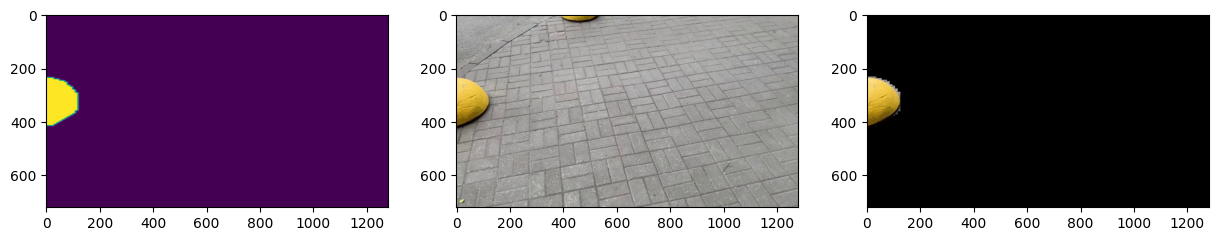

(720, 1280, 3)


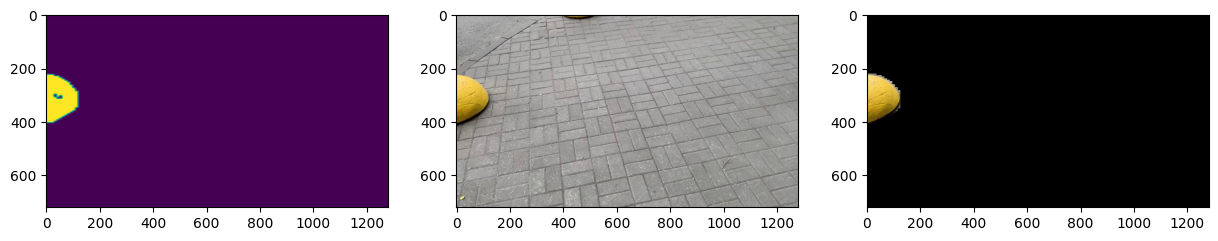

(720, 1280, 3)


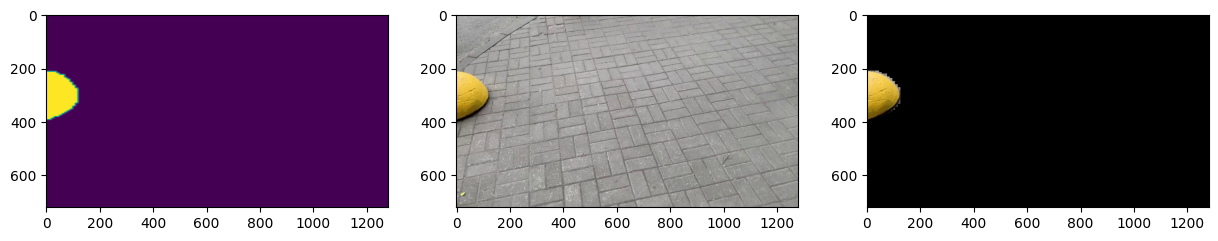

(720, 1280, 3)


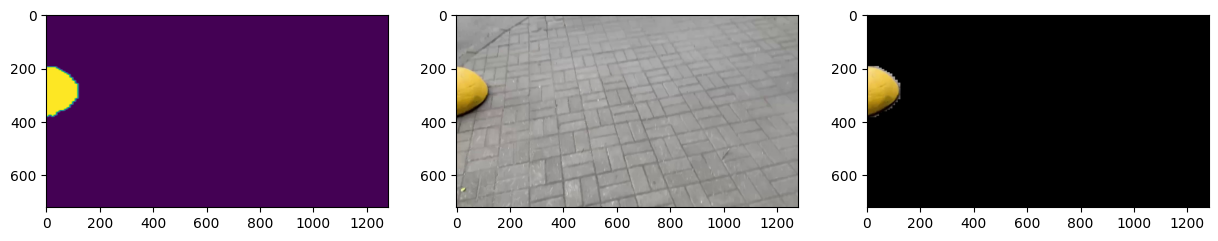

(720, 1280, 3)


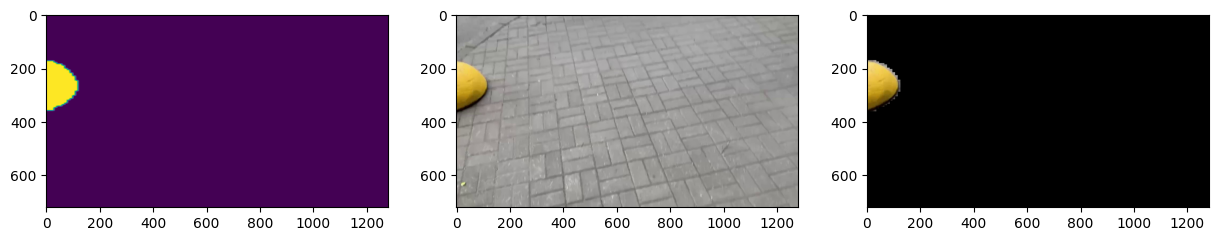

(720, 1280, 3)


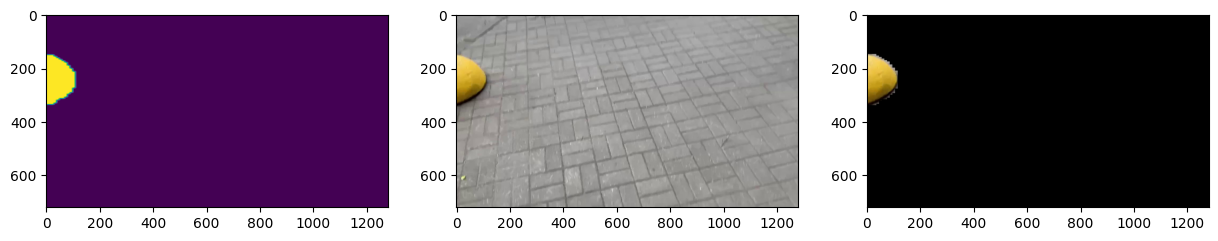

(720, 1280, 3)


KeyboardInterrupt: 

In [58]:
data_folder = "film3-opencv"
for img_name in sorted(os.listdir(data_folder)):
    test_model(data_folder, img_name, final_model)

In [18]:
data_folder = "film7-opencv"
video_name = 'video7.mp4'
frame = cv2.imread(os.path.join(data_folder, sorted(os.listdir(data_folder))[0]))
height, width, layers = frame.shape
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
video = cv2.VideoWriter(filename=video_name, fourcc=fourcc, fps=30.0, frameSize=(width, height))
for img_name in tqdm(sorted(os.listdir(data_folder))):
    video.write(np.uint8(run_model(data_folder, img_name, final_model)))

cv2.destroyAllWindows()
video.release()

OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


  0%|          | 0/266 [00:00<?, ?it/s]

In [51]:
sorted(os.listdir(data_folder))

['frame0-00-00.03.jpg',
 'frame0-00-00.07.jpg',
 'frame0-00-00.10.jpg',
 'frame0-00-00.13.jpg',
 'frame0-00-00.17.jpg',
 'frame0-00-00.20.jpg',
 'frame0-00-00.23.jpg',
 'frame0-00-00.27.jpg',
 'frame0-00-00.30.jpg',
 'frame0-00-00.33.jpg',
 'frame0-00-00.37.jpg',
 'frame0-00-00.40.jpg',
 'frame0-00-00.43.jpg',
 'frame0-00-00.47.jpg',
 'frame0-00-00.50.jpg',
 'frame0-00-00.53.jpg',
 'frame0-00-00.57.jpg',
 'frame0-00-00.60.jpg',
 'frame0-00-00.63.jpg',
 'frame0-00-00.67.jpg',
 'frame0-00-00.70.jpg',
 'frame0-00-00.73.jpg',
 'frame0-00-00.77.jpg',
 'frame0-00-00.80.jpg',
 'frame0-00-00.83.jpg',
 'frame0-00-00.87.jpg',
 'frame0-00-00.90.jpg',
 'frame0-00-00.93.jpg',
 'frame0-00-00.97.jpg',
 'frame0-00-01.03.jpg',
 'frame0-00-01.07.jpg',
 'frame0-00-01.10.jpg',
 'frame0-00-01.13.jpg',
 'frame0-00-01.17.jpg',
 'frame0-00-01.20.jpg',
 'frame0-00-01.23.jpg',
 'frame0-00-01.27.jpg',
 'frame0-00-01.30.jpg',
 'frame0-00-01.33.jpg',
 'frame0-00-01.37.jpg',
 'frame0-00-01.40.jpg',
 'frame0-00-01.4

In [6]:

img = cv2.imread("film-opencv/frame0-00-00.03.jpg")

In [8]:
img.shape

(720, 1280, 3)

In [21]:
a = np.random.randint(10, 10, 3)

ValueError: low >= high

In [20]:
a

array([6, 5, 1])